   ID HomeOwner MartialStatus  Income Defaulted
0   1     'yes'      'single'  125000      'no'
1   2      'no'     'married'  100000      'no'
2   3      'no'      'single'   70000      'no'
3   4     'yes'     'married'  120000      'no'
4   5      'no'    'divorced'   95000     'yes'
5   6      'no'      'single'   60000      'no'
6   7     'yes'    'divorced'  220000      'no'
7   8      'no'      'single'   85000     'yes'
8   9      'no'     'married'   75000      'no'
9  10      'no'      'single'   90000     'yes'
After converting categorical data
   ID  HomeOwner  MartialStatus  Income  Defaulted
0   1          1              1  125000          0
1   2          0              0  100000          0
2   3          0              0   70000          0
3   4          1              1  120000          0
4   5          0              0   95000          1
5   6          0              0   60000          0
6   7          1              1  220000          0
7   8          0              

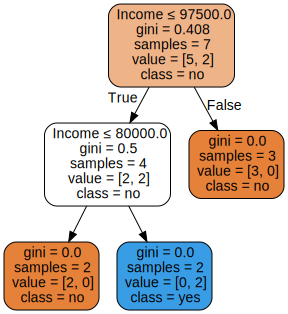

In [25]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import graphviz
#reading csv file
df=pd.read_csv('loan_dataset.csv')
print(df)
df_copy=df.copy()
#create an object for label Binarizer class
obj=LabelEncoder()
#coverting categorical data of a dataset
df_copy['HomeOwner']=obj.fit_transform(df_copy['HomeOwner'])
df_copy['MartialStatus']=obj.fit_transform(df_copy['HomeOwner'])
df_copy['Defaulted']=obj.fit_transform(df_copy['Defaulted'])
print("After converting categorical data")
print(df_copy)
#Building ths model
feature_cols=['HomeOwner','MartialStatus','Income']
#crete a target variable
X=df_copy[feature_cols]
y=df_copy.Defaulted
#dividing training and testing datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
#training the model
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
#predicting the target variable
y_pred=clf.predict(X_test)
print(y_pred)
#find tthe accuracy of model
print("ACCURACY:",metrics.accuracy_score(y_test,y_pred))
#visualizing the model
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=feature_cols,class_names=['no','yes'],filled=True,rounded=True,
                              special_characters=True)
graph=graphviz.Source(dot_data)
graph
    
